## Image Dilation

We tried image dilation on our dataset and retrieved dilated images that focus on the region of interest. 

In [51]:
##
## data_loader.py
##


import numpy as np
from easydict import EasyDict
import glob
import cv2 as cv
import pdb

def data_loader(label_indices, channel_means, train_test_split = 0.7, input_image_size = (227, 227), data_path = '../data'):

    '''
    Load, resize, subtract mean, and store data in easydicts.
    '''

    num_classes = len(label_indices)

    #Covert Channel means list to array
    channel_means = np.array(channel_means)
    # pdb.set_trace()
    #Pull in image filenames:
    im_paths = glob.glob('Data Annotation/*/*.jpg')

    #Train test split
    num_training_examples = int(np.round(train_test_split*len(im_paths)))
    num_testing_examples = len(im_paths) - num_training_examples

    random_indices = np.arange(len(im_paths))
    np.random.shuffle(random_indices)

    training_indices = random_indices[:num_training_examples]
    testing_indices = random_indices[num_training_examples:]

    #Make easydicts for data
    data = EasyDict()
    data.train = EasyDict()
    data.test = EasyDict()
    data.train.X = np.zeros((num_training_examples, input_image_size[0], input_image_size[1], 3),dtype = 'float32')
    data.train.y = np.zeros((num_training_examples, num_classes), dtype = 'float32')

    data.test.X = np.zeros((num_testing_examples, input_image_size[0], input_image_size[1], 3), dtype = 'float32')
    data.test.y = np.zeros((num_testing_examples, num_classes), dtype = 'float32')

    for count, index in enumerate(training_indices):
        im = cv2.imread(im_paths[index])
        im = cv2.resize(im, (input_image_size[1], input_image_size[0]))
        
        gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
        ret,thresh = cv2.threshold(gray,50,255,cv2.THRESH_BINARY_INV)
        kernel = np.ones((1,1), np.uint8) 
        img_dilation = cv2.dilate(thresh, kernel, iterations=1) 
        class_name = im_paths[index].split('\\')[-2]
        cv.imwrite(f'Data Transformed/{class_name}/{index}_train.png',img_dilation)

        data.train.X[count, :, :, :] = im - channel_means  
        data.train.y[count, label_indices[class_name]] = 1
    
    for count, index in enumerate(testing_indices):
        im = cv2.imread(im_paths[index])
        im = cv2.resize(im, (input_image_size[1], input_image_size[0]))
        
        gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
        ret,thresh = cv2.threshold(gray,50,255,cv2.THRESH_BINARY_INV)
        kernel = np.ones((1,1), np.uint8) 
        img_dilation = cv2.dilate(thresh, kernel, iterations=1) 
        class_name = im_paths[index].split('\\')[-2]

        cv.imwrite(f'Data Transformed/{class_name}/{index}_test.png',img_dilation)
        
        data.test.X[count, :, :, :] = im - channel_means
    
        data.test.y[count, label_indices[class_name]] = 1

    print('Loaded', str(len(training_indices)), 'training examples and ', str(len(testing_indices)), 'testing examples. ')

    return data


In [52]:

data_loader(labels,np.array([1,1,1]))

Loaded 146 training examples and  63 testing examples. 


{'train': {'X': array([[[[ 38.,  33.,  39.],
           [  5.,   5.,  11.],
           [  7.,   6.,  10.],
           ...,
           [ 24.,  15.,  12.],
           [ 26.,  15.,  17.],
           [ 25.,  14.,  16.]],
  
          [[ 40.,  37.,  46.],
           [  6.,   7.,  11.],
           [  5.,   4.,   8.],
           ...,
           [ 24.,  14.,  14.],
           [ 26.,  15.,  17.],
           [ 27.,  16.,  18.]],
  
          [[ 39.,  34.,  40.],
           [  6.,   8.,   9.],
           [  5.,   4.,   8.],
           ...,
           [ 25.,  16.,  17.],
           [ 24.,  16.,  18.],
           [ 23.,  15.,  17.]],
  
          ...,
  
          [[ 33.,  34.,  44.],
           [ 33.,  33.,  42.],
           [ 36.,  34.,  54.],
           ...,
           [ 29.,  28.,  35.],
           [ 36.,  34.,  45.],
           [ 31.,  36.,  34.]],
  
          [[ 34.,  31.,  46.],
           [ 26.,  27.,  37.],
           [ 40.,  37.,  53.],
           ...,
           [ 36.,  36.,  42.],
    

In [53]:
labels = { "Blouse": 0 ,"Dress":1, "Jacket":2, "Pant":3 ,"Shirt":4, "Shorts" : 5,"Skirt" : 6,"Sweater" :7,"Sweatshirt" : 8,"Table" : 9,"Tshirts" : 10 }

## Results

A few examples of dilated images we got

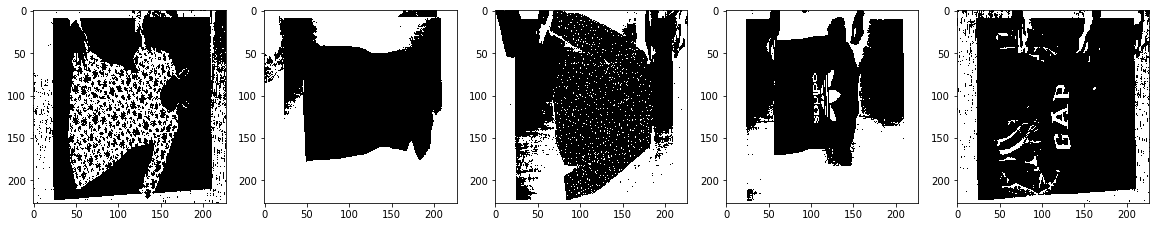

In [62]:
import matplotlib.pyplot as plt
img_A= cv.imread("C:\\Users\\akank\\Desktop\\Semester 3\\Computer Vision\\Data Transformed\\Dress\\53_test.png")
img_B= cv.imread("C:\\Users\\akank\\Desktop\\Semester 3\\Computer Vision\\Data Transformed\\Dress\\76_train.png")
img_C= cv.imread("C:\\Users\\akank\\Desktop\\Semester 3\\Computer Vision\\Data Transformed\\Shirt\\112_train.png")
img_D= cv.imread("C:\\Users\\akank\\Desktop\\Semester 3\\Computer Vision\\Data Transformed\\Tshirts\\186_test.png")
img_E= cv.imread("C:\\Users\\akank\\Desktop\\Semester 3\\Computer Vision\\Data Transformed\\Sweatshirt\\160_train.png")

#plt.imshow(img)
#plt.show()

fig, ax = plt.subplots(1,5,figsize=(20,20))
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C);
ax[3].imshow(img_D);
ax[4].imshow(img_E);

We observed that some images turned out fine but some are unclear. Therefore, we have decided to try out image segmentation on our dataset to see better results.